# Section 1: Understanding the data

In [1]:
# each row providing details of the borrower, including their income, total loans outstanding, and a few other metrics
# There is also a column indicating if the borrower has previously defaulted on a loan (target variable we want to predict)
# use this data to build a model that, given details for any loan described above, will predict the probability that the borrower will default (also known as PD: the probability of default).
# Use the provided data to train a function that will estimate the probability of default for a borrower.
# Assuming a recovery rate of 10%, this can be used to give the expected loss on a loan.

In [2]:
# models to use and test: random forest classifier, logistic regression model, k means clustering, k nearest neighbours, support vector machine, self-organizing map

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('Loan_Data.csv')
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [5]:
# descriptive statistics for the data
df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [6]:
# data for each column
df.dtypes

customer_id                   int64
credit_lines_outstanding      int64
loan_amt_outstanding        float64
total_debt_outstanding      float64
income                      float64
years_employed                int64
fico_score                    int64
default                       int64
dtype: object

In [7]:
# seems like there are no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


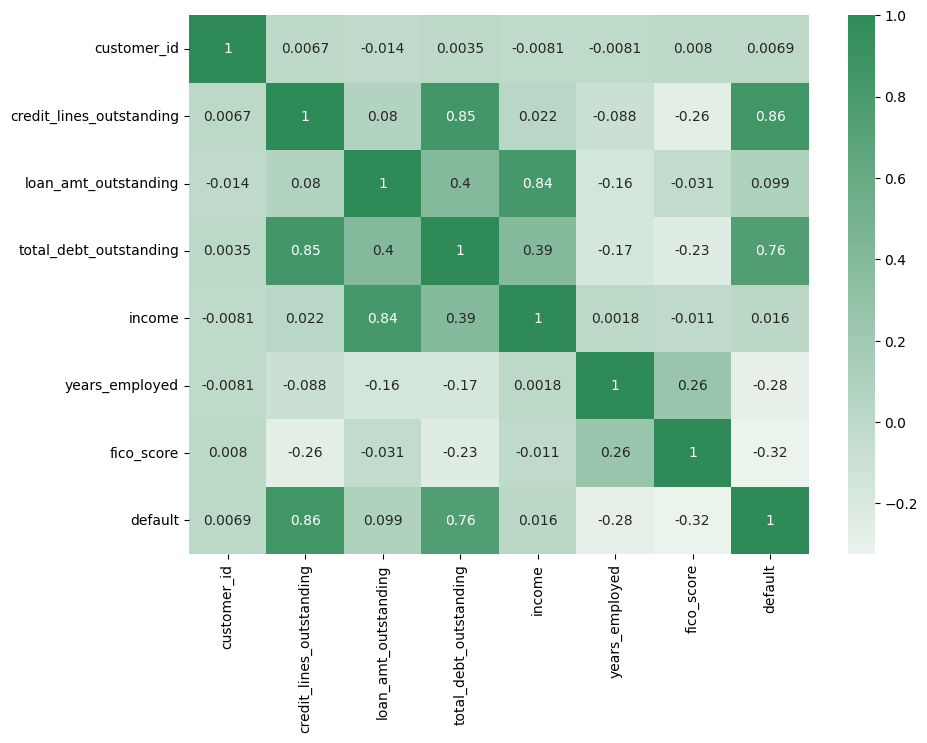

In [8]:
# plot heatmap of correlation coefficients
fig, ax = plt.subplots(figsize=(10, 7))

sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap=sns.light_palette("seagreen", as_cmap=True)
)

plt.show()

# Section 2: Data Visualization

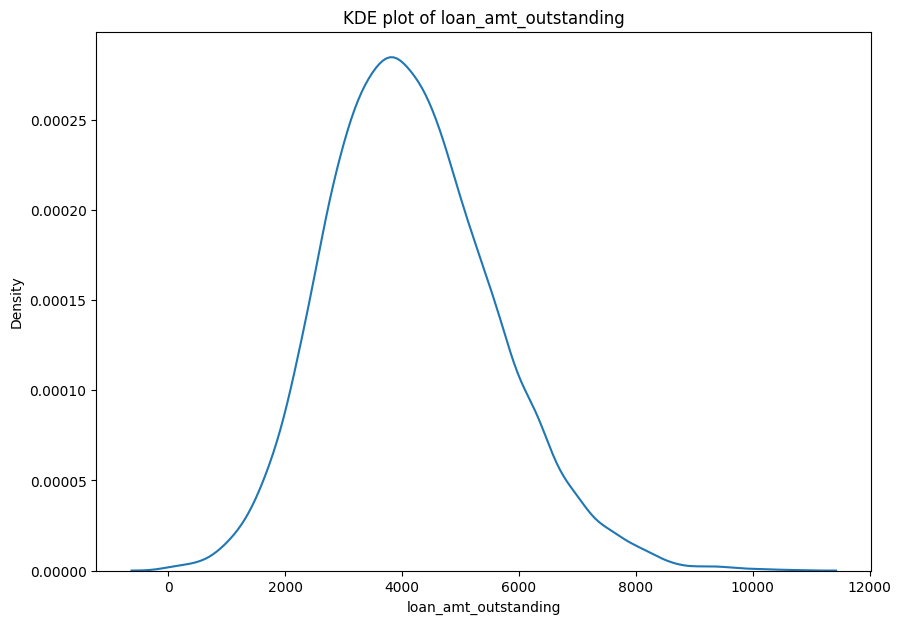

In [9]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.kdeplot(
    df,
    x='loan_amt_outstanding',
).set(title='KDE plot of loan_amt_outstanding')

plt.show()

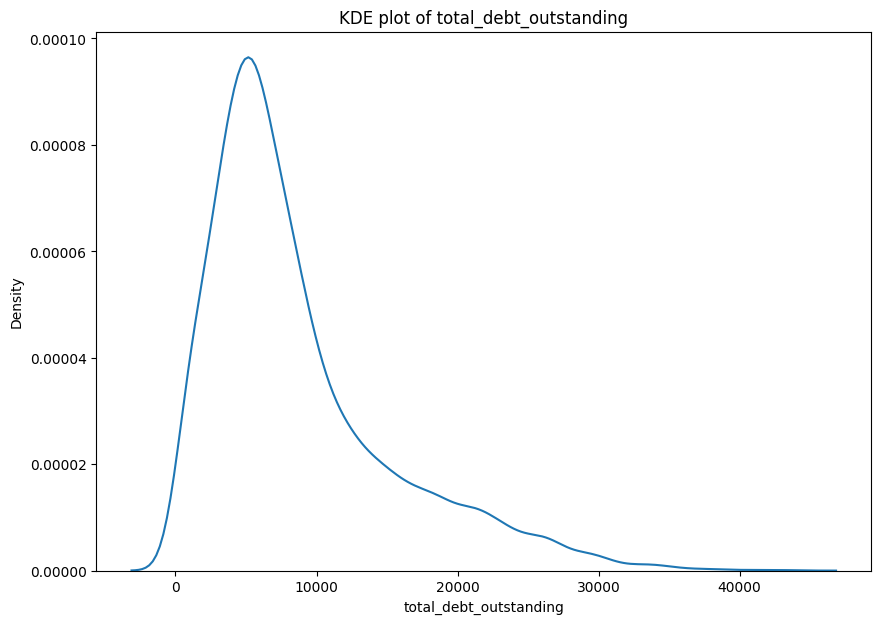

In [10]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.kdeplot(
    df,
    x='total_debt_outstanding',
).set(title='KDE plot of total_debt_outstanding')

plt.show()
# right-skewed data

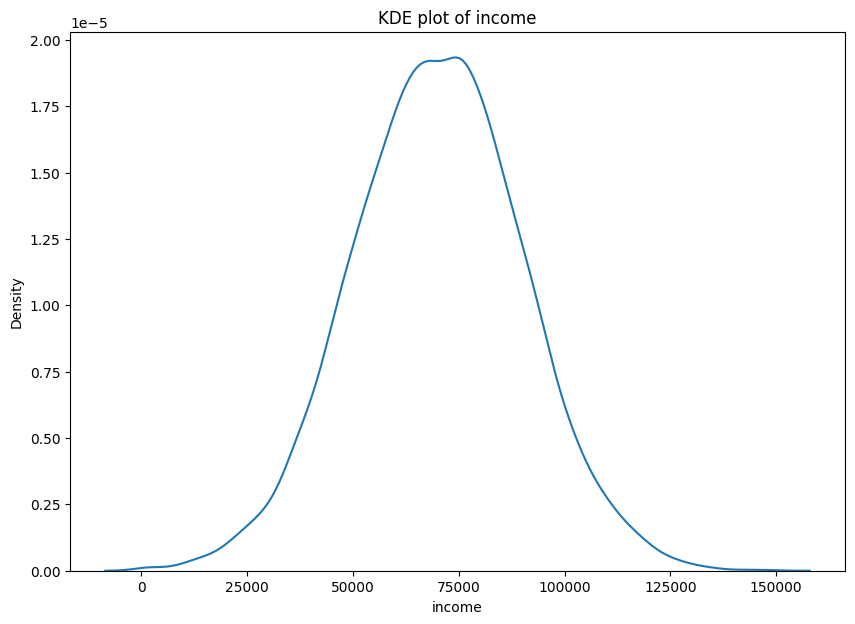

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.kdeplot(
    df,
    x='income',
).set(title='KDE plot of income')

plt.show()

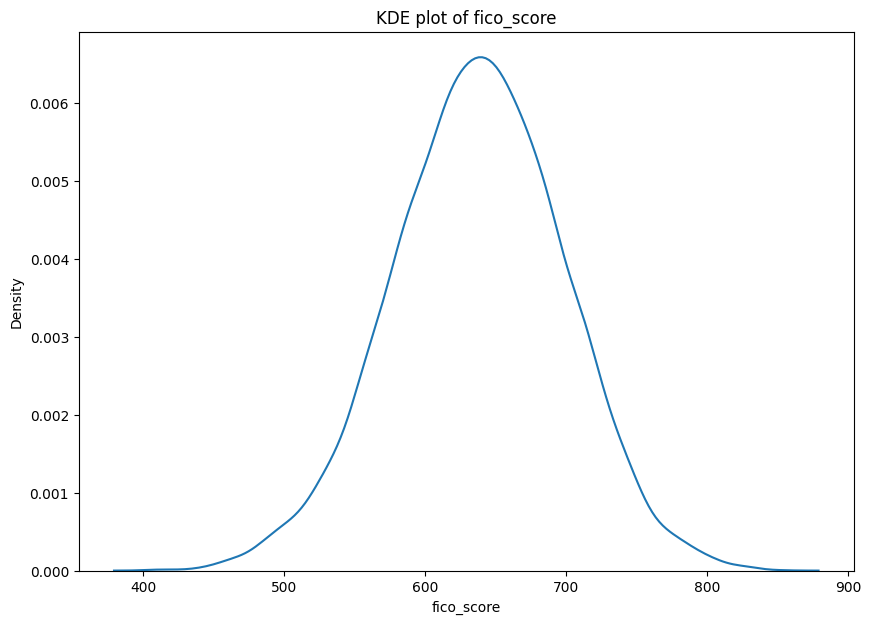

In [12]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.kdeplot(
    df,
    x='fico_score',
).set(title='KDE plot of fico_score')

plt.show()

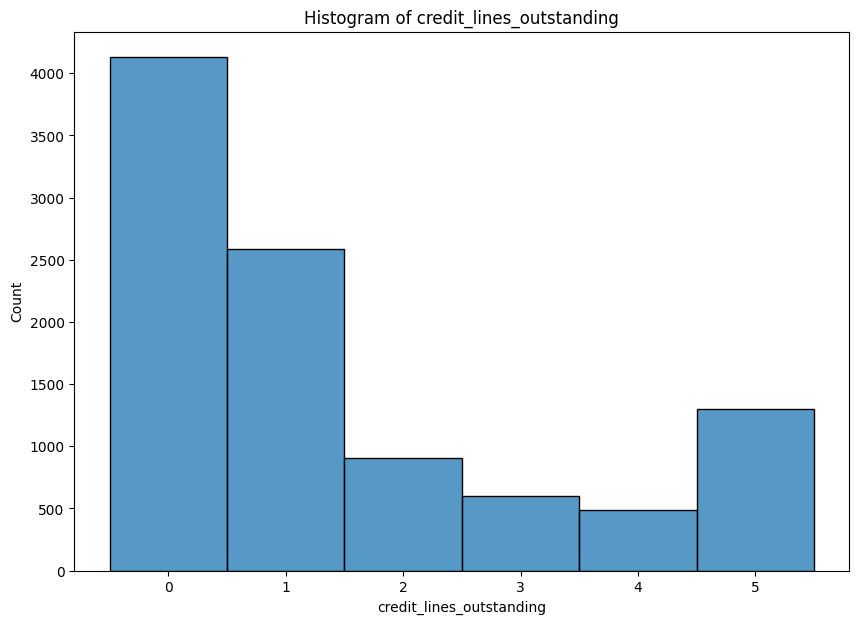

In [13]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.histplot(
    df,
    x='credit_lines_outstanding',
    discrete=True
).set(title='Histogram of credit_lines_outstanding')

plt.show()

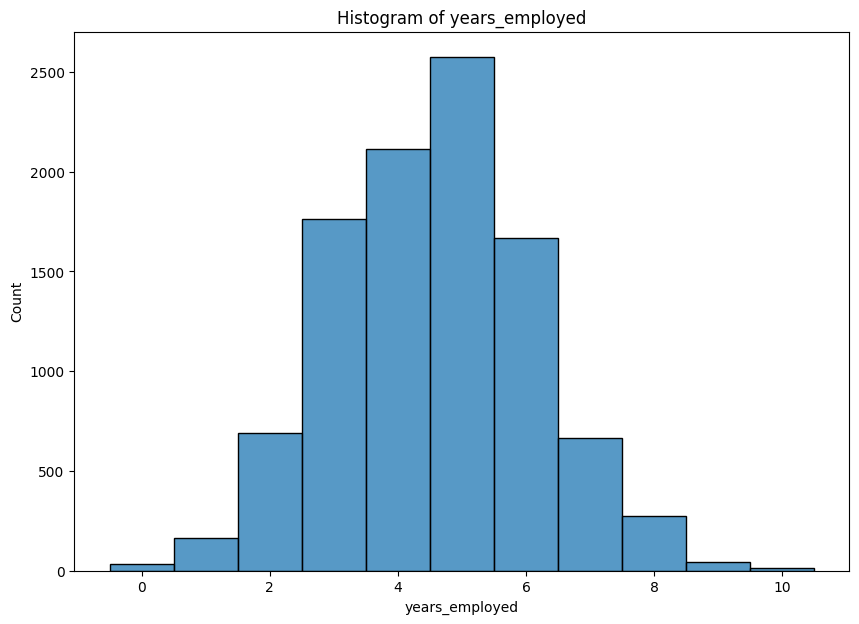

In [14]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.histplot(
    df,
    x='years_employed',
    discrete=True
).set(title='Histogram of years_employed')

plt.show()

In [15]:
# calculate the skewness of each variable
df.skew().sort_values(ascending=False)

default                     1.621857
total_debt_outstanding      1.414046
credit_lines_outstanding    1.029719
loan_amt_outstanding        0.421500
years_employed              0.079835
customer_id                 0.007639
income                     -0.011704
fico_score                 -0.080742
dtype: float64

# Section 3: Training Models

In [16]:
df = df.drop(columns=['customer_id'])
df.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,0,5221.545193,3915.471226,78039.38546,5,605,0
1,5,1958.928726,8228.752520,26648.43525,2,572,1
2,0,3363.009259,2027.830850,65866.71246,4,602,0
3,0,4766.648001,2501.730397,74356.88347,5,612,0
4,1,1345.827718,1768.826187,23448.32631,6,631,0


In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [18]:
df1 = df.copy()
X = df1.drop(columns='default')
X.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score
0,0,5221.545193,3915.471226,78039.38546,5,605
1,5,1958.928726,8228.752520,26648.43525,2,572
2,0,3363.009259,2027.830850,65866.71246,4,602
3,0,4766.648001,2501.730397,74356.88347,5,612
4,1,1345.827718,1768.826187,23448.32631,6,631


In [19]:
# normalize data using min-max scaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
y = df1['default']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Logistic Regression model**

In [21]:
# we will first use a logistic regression model for the predictions
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
train_score = log_model.score(X_train, y_train)
print(f'Training score is {train_score}')

y_pred = log_model.predict(X_test)
score = log_model.score(X_test, y_test)
print(f'Test score is {score}')

Training score is 0.9932857142857143
Test score is 0.9916666666666667


In [22]:
scores = cross_val_score(log_model, X, y, cv=10, scoring='accuracy')
scores

array([0.997, 0.989, 0.999, 0.996, 0.989, 0.994, 0.996, 0.992, 0.992,
       0.992])

In [23]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'Number of true negatives: {tn}')
print(f'Number of false positives: {fp}')
print(f'Number of false negatives: {fn}')
print(f'Number of true positives: {tp}')

Number of true negatives: 2453
Number of false positives: 6
Number of false negatives: 19
Number of true positives: 522


In [24]:
# area under Receiver Operating Characteristic Curve (ROC)
roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1])

0.9997090923304861

**Decision Tree Classifier**

In [25]:
clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=3)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)

test_score = clf.score(X_test, y_test)

print(f'train score: {train_score}')
print(f'test score: {test_score}')

train score: 0.998
test score: 0.995


In [26]:
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
scores

array([0.996, 0.994, 0.999, 0.997, 0.993, 0.997, 0.993, 0.996, 0.994,
       0.993])

In [27]:
y_pred = clf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'Number of true negatives: {tn}')
print(f'Number of false positives: {fp}')
print(f'Number of false negatives: {fn}')
print(f'Number of true positives: {tp}')

Number of true negatives: 2451
Number of false positives: 8
Number of false negatives: 7
Number of true positives: 534


In [28]:
# area under ROC curve
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.9949305392165338

**Support Vector Classifier**

In [29]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
train_score = svc.score(X_train, y_train)

test_score = svc.score(X_test, y_test)

print(f'train score: {train_score}')
print(f'test score: {test_score}')

train score: 0.9971428571428571
test score: 0.9953333333333333


In [30]:
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
scores

array([0.997, 0.996, 1.   , 0.998, 0.991, 1.   , 0.998, 0.997, 0.996,
       0.993])

In [31]:
y_pred = svc.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'Number of true negatives: {tn}')
print(f'Number of false positives: {fp}')
print(f'Number of false negatives: {fn}')
print(f'Number of true positives: {tp}')

Number of true negatives: 2454
Number of false positives: 5
Number of false negatives: 9
Number of true positives: 532


In [32]:
# area under ROC curve
roc_auc_score(y_test, svc.predict_proba(X_test)[:,1])

0.9998947620833799

Testing for model deployment
1. Save the models in pickle files
2. Use Docker
3. Try to get Docker to run

In [41]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

In [40]:
import pickle

with open('models', 'wb') as f:
    pickle.dump((log_model, clf, svc, dv), f)

# Conclusion

To minimize false negatives, the decision tree classifier seems to work best.

In [42]:
# estimate the probability of default based on customer characteristics
# using the decision tree classifier, we can estimate the probability of default of each customer

In [43]:
def predict_loss(credit_lines_outstanding, loan_amt_outstanding, total_debt_outstanding, income, years_employed, fico_score):
  # takes in borrower data and converts it into a dataframe
  borrower_data = [credit_lines_outstanding, loan_amt_outstanding, total_debt_outstanding, income, years_employed, fico_score]
  borrower_df = pd.DataFrame(borrower_data, columns=['credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score'])

  # use the trained random forest classifier model to predict the outcome
  outcome = clf.predict(outcome)

  if outcome == 1:
    # 10% of loan amount will be recovered
    recovery_value = 0.1 * borrower_df['loan_amt_outstanding']
    print(f'Borrower is likely to default and recovery value is {recovery_value}.')

# Task 4

In [44]:
# map FICO scores into certain ranges to convert it into categorical data
# FICO score is a value between 300 to 850
# construct a technique for predicting the PD (probability of default) for the borrowers using these scores
# create a rating map that maps the FICO score of the borrowers to a rating where a lower rating signifies a better credit score

In [45]:
min = 300
max = 850

bins = np.linspace(min,max, 5)

In [46]:
df['fico_category'] = pd.cut(df['fico_score'], bins=bins, labels=['ex_low', 'low', 'medium', 'high'], include_lowest=True)
df.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,fico_category
0,0,5221.545193,3915.471226,78039.38546,5,605,0,medium
1,5,1958.928726,8228.752520,26648.43525,2,572,1,low
2,0,3363.009259,2027.830850,65866.71246,4,602,0,medium
3,0,4766.648001,2501.730397,74356.88347,5,612,0,medium
4,1,1345.827718,1768.826187,23448.32631,6,631,0,medium
